In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot') # グラフを少しお洒落に

In [4]:
import datetime
my_date = [datetime.date(2018, 2, 15),
           datetime.date(2018, 2, 16),
           datetime.date(2018, 2, 17)]
print(my_date)

[datetime.date(2018, 2, 15), datetime.date(2018, 2, 16), datetime.date(2018, 2, 17)]


In [5]:
my1_values = [10.0, 25.2, 30.3]
print(my1_values)

[10.0, 25.2, 30.3]


In [6]:
series1 = pd.Series(my1_values, index=my_date)

In [7]:
print(series1)

2018-02-15    10.0
2018-02-16    25.2
2018-02-17    30.3
dtype: float64


In [8]:
my2_values = [100.0, 200.0, 300.0]
print(my2_values)

[100.0, 200.0, 300.0]


In [9]:
my_df = pd.DataFrame({'Aモモノキ': my1_values,
                      'Bナノネ': my2_values},
                     index=my_date)

In [10]:
my_df

,Aモモノキ,Bナノネ
2018-02-15,10.0,100.0
2018-02-16,25.2,200.0
2018-02-17,30.3,300.0


In [11]:
my_df['Aモモノキ']

2018-02-15    10.0
2018-02-16    25.2
2018-02-17    30.3
Name: Aモモノキ, dtype: float64

In [12]:
my_df[['Aモモノキ']]

,Aモモノキ
2018-02-15,10.0
2018-02-16,25.2
2018-02-17,30.3


In [13]:
my_df.describe()

,Aモモノキ,Bナノネ
count,3.000000,3.0
mean,21.833333,200.0
std,10.560461,100.0
min,10.000000,100.0
25%,17.600000,150.0
50%,25.200000,200.0
75%,27.750000,250.0
max,30.300000,300.0


In [14]:
my_df['Cウメノキ'] = [0.1, 0.2, 0.3] # 列データを1個追加
my_df['Dカキノキ'] = [1.0, 1.0, 1.0] # 列データを1個追加
my_df

,Aモモノキ,Bナノネ,Cウメノキ,Dカキノキ
2018-02-15,10.0,100.0,0.1,1.0
2018-02-16,25.2,200.0,0.2,1.0
2018-02-17,30.3,300.0,0.3,1.0


In [15]:
# 元データから削除したい場合は変数に再代入が必要。
my_df = my_df.drop('Cウメノキ', axis=1) # axis=1で列方向削除を指定する
my_df

,Aモモノキ,Bナノネ,Dカキノキ
2018-02-15,10.0,100.0,1.0
2018-02-16,25.2,200.0,1.0
2018-02-17,30.3,300.0,1.0


In [16]:
del my_df['Dカキノキ']
my_df

,Aモモノキ,Bナノネ
2018-02-15,10.0,100.0
2018-02-16,25.2,200.0
2018-02-17,30.3,300.0


In [17]:
import pandas as pd

In [18]:
import numpy as np
n = 365
date_index=pd.date_range('2018-01-01', freq='D', periods=365) # 日付1年分 
values = np.cumsum(np.random.randn(n)) # 正規乱数365個、足し合わせ
my_df = pd.DataFrame({'val': values}, index=date_index)
my_df.head()

,val
2018-01-01,-0.099143
2018-01-02,0.843020
2018-01-03,0.954462
2018-01-04,0.607020
2018-01-05,1.446138


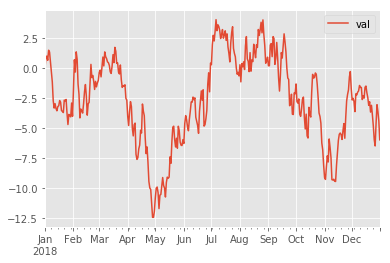

In [19]:
%matplotlib inline
my_df.plot()

In [20]:
my_df_down = my_df.resample('M').mean() # 月(末)単位、値は平均化
my_df_down

,val
2018-01-31,-2.286294
2018-02-28,-1.697310
2018-03-31,-0.155753
2018-04-30,-6.699711
2018-05-31,-8.152007
2018-06-30,-3.456069
2018-07-31,2.021215
2018-08-31,1.316119
2018-09-30,-0.057238
2018-10-31,-3.391721


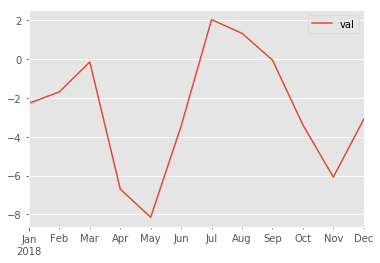

In [21]:
my_df_down.plot() # ダウンサンプリングした月次データ

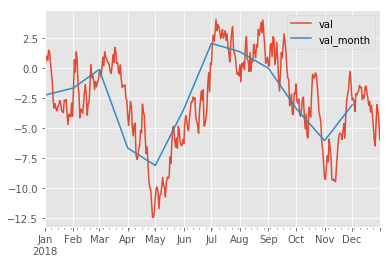

In [22]:
my_df_down = my_df_down.rename(columns={'val': 'val_month'}) # 列名(ラベル)変更
axis = my_df.plot() # 日次
my_df_down.plot(ax=axis) # 月次

In [23]:
import statsmodels.api as sm

In [24]:
sm.version.full_version

'0.9.0'

In [27]:
import os
os.getcwd()

'C:\\Users\\atmos'

In [28]:
os.chdir("C:\\Users\\atmos\\Dropbox\\AM\\2020.AGO_WAN\\200518_ARMA_TEST")

In [29]:
os.getcwd()

'C:\\Users\\atmos\\Dropbox\\AM\\2020.AGO_WAN\\200518_ARMA_TEST'

In [30]:
df= pd.read_csv("AirPassengers.csv")

In [31]:
df.head() # DataFrame先頭5行

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [32]:
passengers = pd.Series(df['#Passengers'], dtype='float') # ①
passengers.index = pd.to_datetime(df['Month']) # ②

In [33]:
print(passengers.index.dtype) # インデックス(日付) -> datetime型
print(len(passengers)) # データ件数 -> 144
passengers.head() # データ値(乗客数) -> float型

datetime64[ns]
144


Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

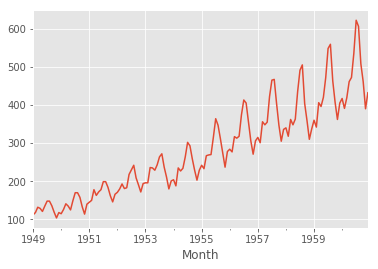

In [34]:
passengers.plot()

In [35]:
sm.tsa.seasonal_decompose(passengers)

In [36]:
res = sm.tsa.seasonal_decompose(passengers)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

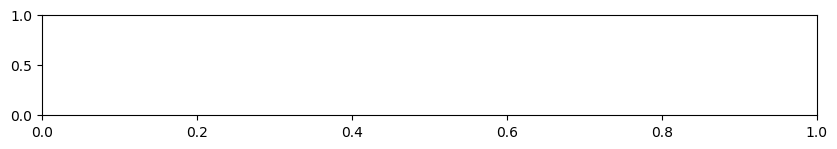

In [110]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(10, 6)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.set_xlim(datetime.datetime(1948,1,1), datetime.datetime(1965,12,31)) # 範囲指定

plt.plot(original, c="r", label="observation")
plt.ylabel('Observation')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend, label="trend")
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal, label="seasonality")
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual,label="residual")
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

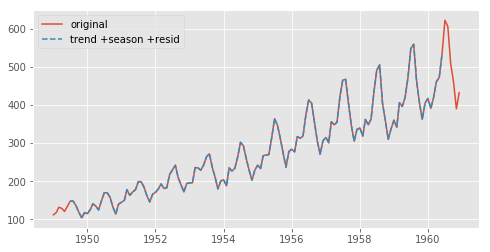

In [39]:
# res = sm.tsa.seasonal_decompose(passengers) # 解析結果は取得済み

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(8, 4)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

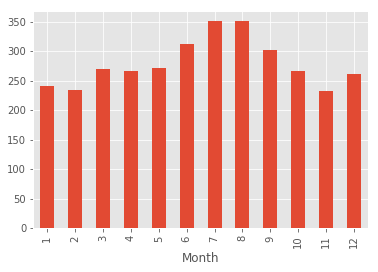

In [40]:
passengers_month_mean = passengers.groupby(passengers.index.month).mean()
passengers_month_mean.plot(kind='bar')

In [41]:
# 自己相関係数を試しに計算してみた（Numpy利用）
# import numpy as np インポート済み
LAG = 40 # 計算ラグ数
rk = np.empty(LAG+1) # 自己相関係数の計算結果を保持用
y = np.array(passengers) # 乗客数データのndarray作成（計算用）
y_mean = np.mean(y) # 乗客数の平均値

# ラグ0の自己相関係数：1.0
rk[0] = np.sum((y - y_mean)**2) / np.sum((y - y_mean)**2) 

# ラグ1〜40の自己相関係数：-1.0〜1.0
for k in np.arange(1, LAG+1): 
    rk[k] = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)

print(rk) # -> acf()結果と同じ

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


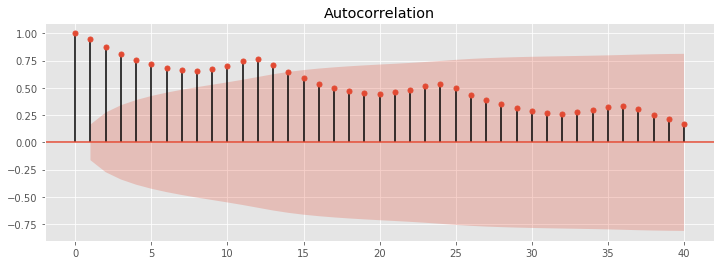

In [42]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(passengers, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

In [43]:
passengers_diff = passengers - passengers.shift() # 階差系列データの作成

In [44]:
passengers_diff = passengers_diff.dropna() # Nanデータ削除
print(len(passengers_diff))
passengers_diff.head()

143


Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

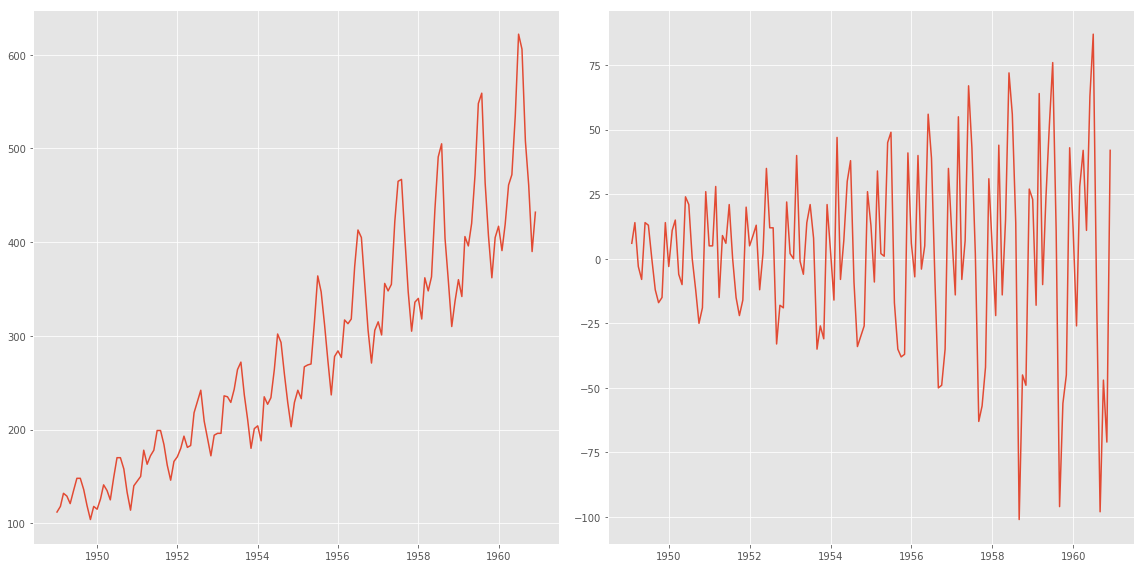

In [45]:
fig = plt.figure(figsize=(16, 8))

# 原型列のグラフ
ax1 = fig.add_subplot(121)
plt.plot(passengers)

# 階差系列のグラフ
ax2 = fig.add_subplot(122)
plt.plot(passengers_diff)

plt.tight_layout() # グラフ間スキマ調整

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


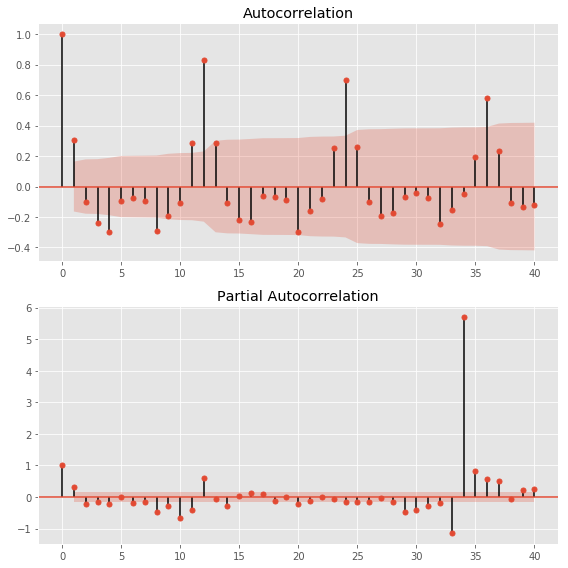

In [46]:
# 階差系列データでコレログラム作成
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(passengers_diff, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(passengers_diff, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [47]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(passengers, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(passengers, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(passengers, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(passengers, regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)

(-3.233677922643624, 0.19594187397031848, 13, 130, {'1%': -4.462541514337733, '5%': -3.8786113536640876, '10%': -3.5817528944014563}, 988.811952559496)
(-2.1007818138446694, 0.5456589343124553, 13, 130, {'1%': -4.030152423759672, '5%': -3.444817634956759, '10%': -3.1471816659080565}, 993.2814778200581)
(0.8153688792060543, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
(2.3906017343512347, 0.9971802685434736, 13, 130, {'1%': -2.583153076923077, '5%': -1.9432510546199364, '10%': -1.614925969959035}, 997.0955704315447)


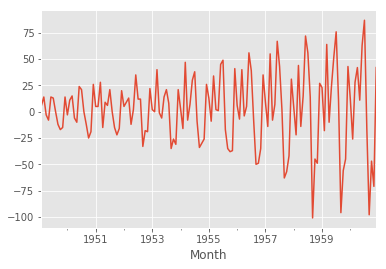

In [48]:
passengers_diff = passengers - passengers.shift() # 差分(1階差)　Pandasのdiff()でpassengers.diff()としてもOK
passengers_diff = passengers_diff.dropna() # 1個できるNaNデータは捨てる
passengers_diff.plot()

In [49]:
import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

# 自動ARMAパラメータ推定関数
res_selection = sm.tsa.arma_order_select_ic(passengers_diff, ic='aic', trend='nc')
res_selection

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175678
 3  1395.021214  1379.614000  1351.138642
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

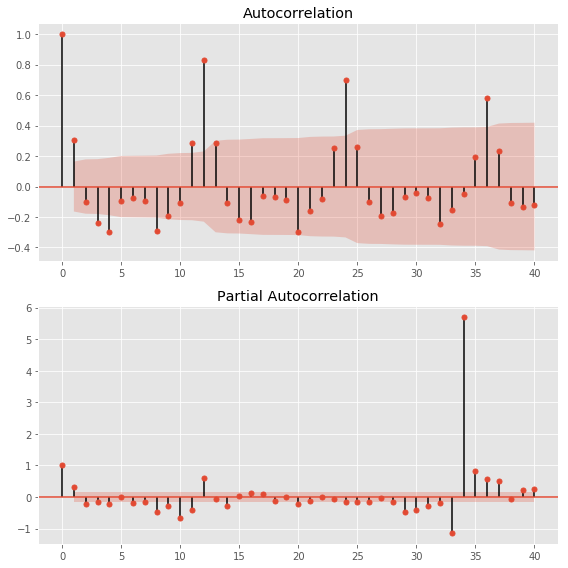

In [50]:
# 差分系列のコレログラム
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(passengers_diff, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(passengers_diff, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [51]:
# SRIMAモデル作成その１
sarimax = sm.tsa.SARIMAX(passengers, 
                        order=(3, 1, 2),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

In [52]:
sarimax_resid = sarimax.resid # モデルの残差成分

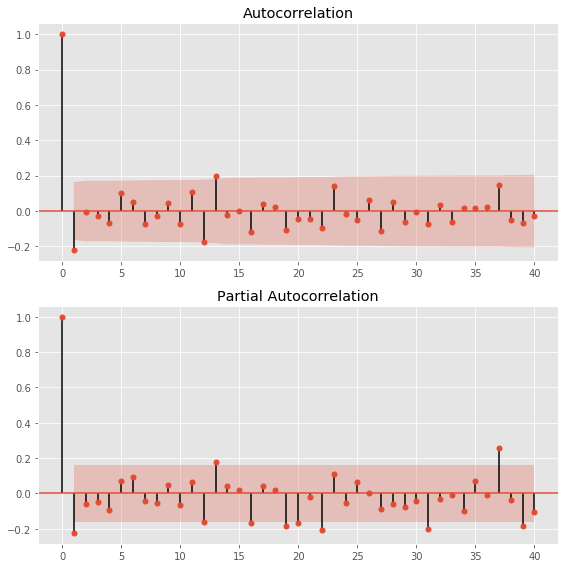

In [53]:
# モデル残差のコレログラム
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

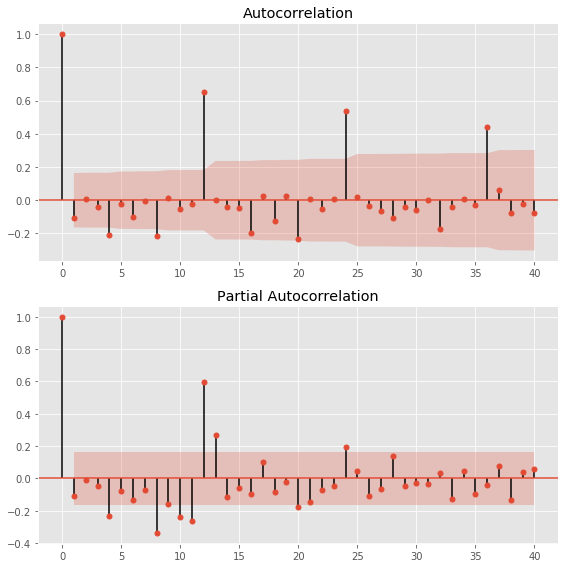

In [54]:
# SRIMAモデル（試しに）季節調整なし
sarimax_noseasonal = sm.tsa.SARIMAX(passengers, 
                        order=(3, 1, 2),
                        seasonal_order=(0, 0, 0, 0),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_noseasonal_resid = sarimax_noseasonal.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_noseasonal_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_noseasonal_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [55]:
print(sarimax.aic) # 季節調整あり -> 914
print(sarimax_noseasonal.aic) # 季節調整なし -> 1352

914.0438874014557
1352.004405042127


In [56]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -449.022
Date:                            Mon, 18 May 2020   AIC                            914.044
Time:                                    20:09:33   BIC                            936.073
Sample:                                01-01-1949   HQIC                           922.986
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0179      0.783      1.301      0.193      -0.516       2.552
ar.L2          0.0165      0.525      0.031      0.975      -1.013       1.046
ar.L3         -0.1802      0.144     -1.250      0.211      -0.463       0.102
ma.L1         -1.4080      0.792     -1.778      0.075      -2.960       0.144
ma.L2          0.4200      0.776      0.541      0.588      -1.101       1.941
ar.S.L12      -0.5400      0.340     -1.588      0.112      -1.206       0.126
ma.S.L12       0.4129      0.405      1.019      0.308      -0.381       1.207
sigma2       131.2928     17.806      7.374      0.000      96.394     166.192
===================================================================================
Ljung-Box (Q):                       49.54   Jarque-Bera (JB):                13.36
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                             0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

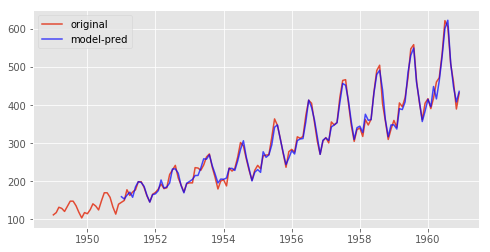

In [57]:
sarimax_pred = sarimax.predict('1951-01', '1960-12') 

plt.figure(figsize=(8, 4))

plt.plot(passengers, label="original")
plt.plot(sarimax_pred, c="b", label="model-pred", alpha=0.7)
plt.legend(loc='best')

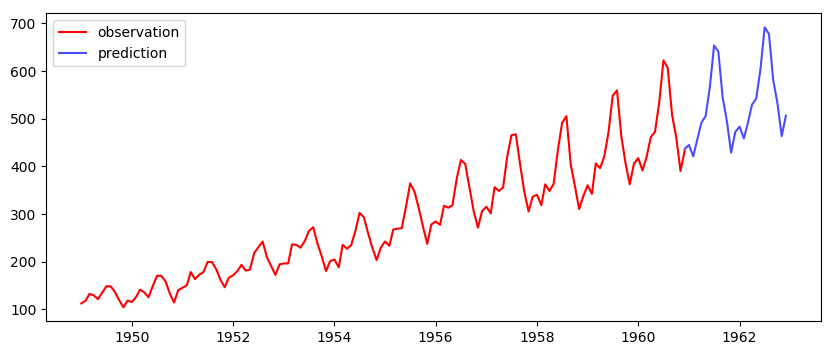

In [89]:
sarimax_pred = sarimax.predict('1960-12', '1962-12') 

plt.figure(figsize=(10, 4))

plt.plot(passengers, c="r", label="observation")
plt.plot(sarimax_pred, c="b", label="prediction", alpha=0.7)
plt.legend(loc='best')

In [59]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3 

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 12 # seasonal_order周期パラメータ
ts = passengers # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p, d, q), 
                            seasonal_order=(sp, sd, sq, sfq), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        test_results.iloc[num]["aic"] = sarima.aic
                        print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                        num = num + 1

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 192
0 / 191 order=(1,0,0), seasonal_order=(0,0,0) 1415.9068815931882
1 / 191 order=(1,0,0), seasonal_order=(0,0,1) 1205.390778617259
2 / 191 order=(1,0,0), seasonal_order=(0,1,0) 1029.977309170107
3 / 191 order=(1,0,0), seasonal_order=(0,1,1) 944.3854921533132
4 / 191 order=(1,0,0), seasonal_order=(1,0,0) 1017.3155493572215
5 / 191 order=(1,0,0), seasonal_order=(1,0,1) 1007.0272557191242
6 / 191 order=(1,0,0), seasonal_order=(1,1,0) 944.0441660828052
7 / 191 order=(1,0,0), seasonal_order=(1,1,1) 945.4400866717212
8 / 191 order=(1,0,1), seasonal_order=(0,0,0) 1390.45150184149
9 / 191 order=(1,0,1), seasonal_order=(0,0,1) 1192.2949631619476
10 / 191 order=(1,0,1), seasonal_order=(0,1,0) 1014.2547824626319
11 / 191 order=(1,0,1), seasonal_order=(0,1,1) 929.4329707892176
12 / 191 order=(1,0,1), seasonal_order=(1,0,0) 1009.5891017292666
13 / 191 order=(1,0,1), seasonal_order=(1,0,1) 989.1764736512395
14 / 191 order=(1,0,1), seasonal_order=(1,1,0) 935.81633482176
15 / 191 order=(1,0

126 / 191 order=(2,1,3), seasonal_order=(1,1,0) 920.9443971629793
127 / 191 order=(2,1,3), seasonal_order=(1,1,1) 906.0326961902073
128 / 191 order=(3,0,0), seasonal_order=(0,0,0) 1380.745870393287
129 / 191 order=(3,0,0), seasonal_order=(0,0,1) 1201.6257665300157
130 / 191 order=(3,0,0), seasonal_order=(0,1,0) 1008.7465064755793
131 / 191 order=(3,0,0), seasonal_order=(0,1,1) 937.5672738392906
132 / 191 order=(3,0,0), seasonal_order=(1,0,0) 996.6216552976383
133 / 191 order=(3,0,0), seasonal_order=(1,0,1) 983.9064042703585
134 / 191 order=(3,0,0), seasonal_order=(1,1,0) 922.4280801306642
135 / 191 order=(3,0,0), seasonal_order=(1,1,1) 928.9789439420047
136 / 191 order=(3,0,1), seasonal_order=(0,0,0) 1381.0403561245146
137 / 191 order=(3,0,1), seasonal_order=(0,0,1) 1166.6295879290228
138 / 191 order=(3,0,1), seasonal_order=(0,1,0) 1010.7204332771863
139 / 191 order=(3,0,1), seasonal_order=(0,1,1) 932.6552398279094
140 / 191 order=(3,0,1), seasonal_order=(1,0,0) 998.6206022272215
141 /

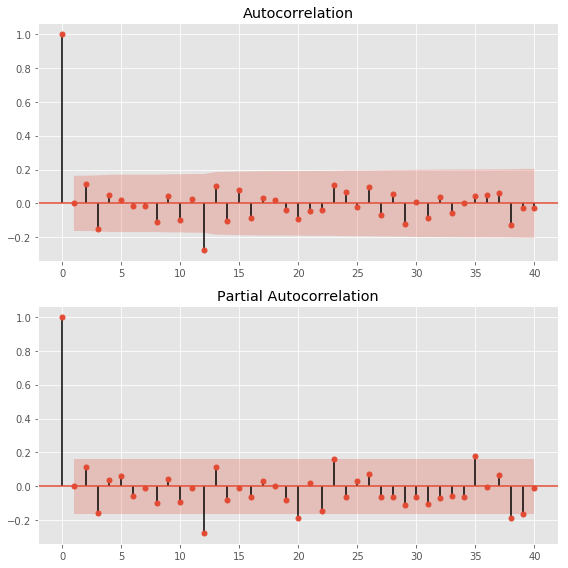

In [60]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(passengers, 
                        order=(3, 1, 3),
                        seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [61]:
# オリジナル passengers 1949-01 ～ 1960-12
passengers_train = passengers['1949-01':'1958-12'] # モデル作成用データ（訓練）
print(passengers_train.head())
print(passengers_train.tail())

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64
Month
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: #Passengers, dtype: float64


In [62]:
passengers_test = passengers['1958-01':'1960-12'] # テスト用データ2年分
print(passengers_test.head())
print(passengers_test.tail())

Month
1958-01-01    340.0
1958-02-01    318.0
1958-03-01    362.0
1958-04-01    348.0
1958-05-01    363.0
Name: #Passengers, dtype: float64
Month
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: #Passengers, dtype: float64


In [63]:
# SRIMAモデル（テストデータを2年分除いてモデル作成）
sarimax_train = sm.tsa.SARIMAX(passengers_train, 
                        order=(3, 1, 3),
                        seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

In [64]:
sarimax_train_pred = sarimax_train.predict('1958-12', '1960-12') # テストデータ2年分予測

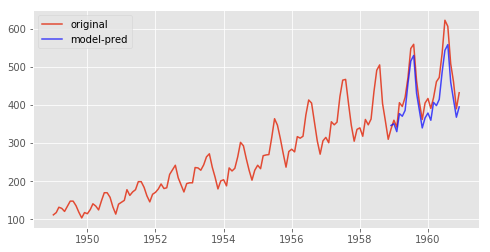

In [65]:
plt.figure(figsize=(8, 4))

plt.plot(passengers, label="original")
plt.plot(sarimax_train_pred, c="b", label="model-pred", alpha=0.7)
plt.legend(loc='best')

In [66]:
# オリジナル passengers 1949-01 ～ 1960-12
passengers_train2 = passengers['1949-01':'1959-12'] # モデル作成用データ（訓練）1年テスト用残し
passengers_test2 = passengers['1960-01':'1960-12'] # テスト用データ1年分

# SRIMAモデル（テストデータ1年を除いてモデル作成）
sarimax_train = sm.tsa.SARIMAX(passengers_train2, 
                        order=(3, 1, 3),
                        seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

In [67]:
sarimax_train2_pred = sarimax_train.predict('1959-12', '1960-12') # テストデータ1年分予測

In [68]:
sarimax_train2_pred = sarimax_train.predict('1959-12', '1960-12') # テストデータ1年分予測

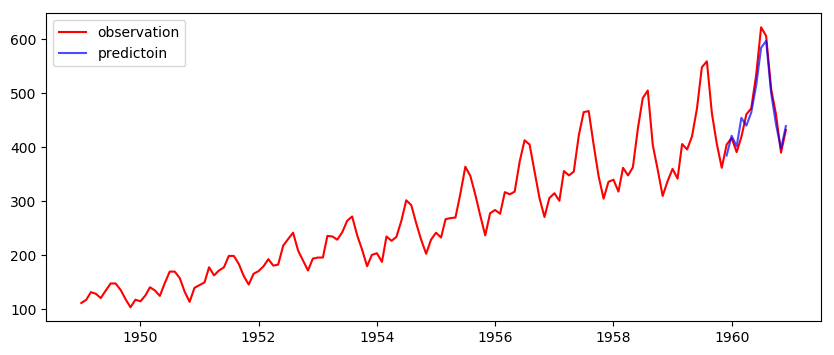

In [93]:
plt.figure(figsize=(10, 4))

plt.plot(passengers, c="r", label="observation")
plt.plot(sarimax_train2_pred, c="b", label="predictoin", alpha=0.7)
plt.legend(loc='best')

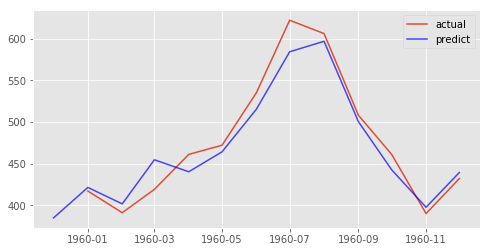

In [70]:
plt.figure(figsize=(8, 4))

plt.plot(passengers_test2, label="actual") # 正解
plt.plot(sarimax_train2_pred, c="b", label="predict", alpha=0.7) # 予測
plt.legend(loc='best')

In [71]:
predict_dy = sarimax_train.get_prediction(start ='1959-12', end='1960-12')
type(predict_dy)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [72]:
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval
type(predict_dy_ci)

pandas.core.frame.DataFrame

In [73]:
predict_dy_ci # lower, upper取得

,lower #Passengers,upper #Passengers
1959-12-01,365.171718,404.342314
1960-01-01,401.752796,440.917256
1960-02-01,376.600154,426.602969
1960-03-01,424.879292,484.178256
1960-04-01,408.392822,471.906779
1960-05-01,431.429890,496.736232
1960-06-01,481.438630,549.045850
1960-07-01,549.544365,618.782568
1960-08-01,561.846364,631.616038
1960-09-01,465.090516,535.525167


In [74]:
predict_dy.predicted_mean # mean取得

1959-12-01    384.757016
1960-01-01    421.335026
1960-02-01    401.601562
1960-03-01    454.528774
1960-04-01    440.149800
1960-05-01    464.083061
1960-06-01    515.242240
1960-07-01    584.163467
1960-08-01    596.731201
1960-09-01    500.307841
1960-10-01    442.505979
1960-11-01    397.514314
1960-12-01    439.229727
Freq: MS, dtype: float64

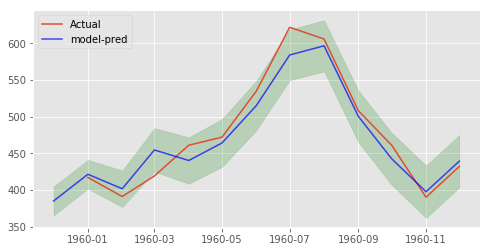

In [75]:
plt.figure(figsize=(8, 4))

plt.plot(passengers_test2, label="Actual")
plt.plot(predict_dy.predicted_mean, c="b", label="model-pred", alpha=0.7)

plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)
plt.legend(loc='upper left')

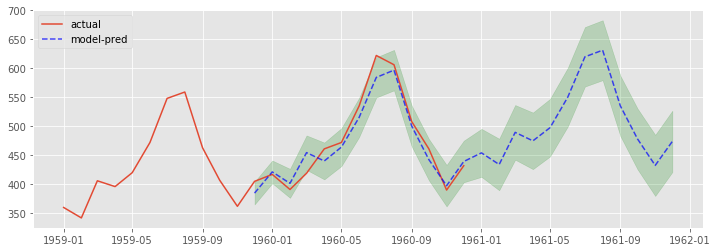

In [76]:
predict2_dy = sarimax_train.get_prediction(start ='1959-12', end='1961-12') # 2年分の未来予測

predict2_dy_ci = predict2_dy.conf_int()

plt.figure(figsize=(12, 4))
plt.plot(passengers['1959-01':], label="actual")
plt.plot(predict2_dy.predicted_mean, c="b", linestyle='--', label="model-pred", alpha=0.7)

plt.fill_between(predict2_dy_ci.index, predict2_dy_ci.iloc[:, 0], predict2_dy_ci.iloc[:, 1], color='g', alpha=0.2)
plt.legend(loc='upper left')

In [77]:
# 実行環境
# import pkg_resources
# for dist in pkg_resources.working_set:
#     print(dist.project_name, dist.version)

In [78]:
# 実行環境
import pkg_resources
for dist in pkg_resources.working_set:
     print(dist.project_name, dist.version)

zipp 0.3.3
zict 0.1.4
xlwt 1.3.0
xlwings 0.15.4
XlsxWriter 1.1.5
xlrd 1.2.0
wrapt 1.11.1
wincertstore 0.2
win-unicode-console 0.5
win-inet-pton 1.1.0
widgetsnbextension 3.4.2
wheel 0.33.1
Werkzeug 0.14.1
webencodings 0.5.1
wcwidth 0.1.7
urllib3 1.24.1
unicodecsv 0.14.1
traitlets 4.3.2
tqdm 4.31.1
tornado 6.0.2
toolz 0.9.0
testpath 0.4.2
terminado 0.8.1
tblib 1.3.2
tables 3.5.1
sympy 1.3
statsmodels 0.9.0
SQLAlchemy 1.3.1
spyder 3.3.3
spyder-kernels 0.4.2
sphinxcontrib-websupport 1.1.0
Sphinx 1.8.5
soupsieve 1.8
sortedcontainers 2.1.0
sortedcollections 1.1.2
snowballstemmer 1.2.1
six 1.12.0
singledispatch 3.4.0.3
simplegeneric 0.8.1
setuptools 40.8.0
Send2Trash 1.5.0
seaborn 0.9.0
scipy 1.2.1
scikit-learn 0.20.3
scikit-image 0.14.2
ruamel-yaml 0.15.46
rope 0.12.0
requests 2.21.0
QtPy 1.7.0
qtconsole 4.4.3
QtAwesome 0.5.7
pyzmq 18.0.0
PyYAML 5.1
pywinpty 0.5.5
pywin32 223
PyWavelets 1.0.2
pytz 2018.9
python-dateutil 2.8.0
pytest 4.3.1
pytest-remotedata 0.3.1
pytest-openfiles 0.3.2
pytest

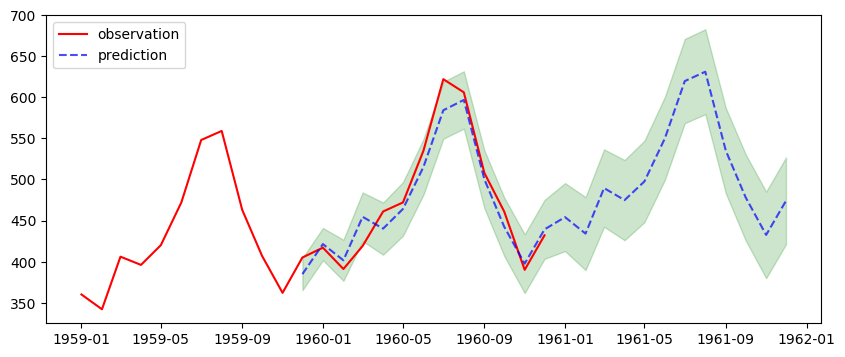

In [91]:
"""
季節調整
信頼区間
https://momonoki2017.blogspot.com/2018/03/python10.html
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcdefaults()
import statsmodels.api as sm # version 0.8.0以上

# CSVファイル読み込み（事前にダウンロードしたCSVファイルを利用）
import os
os.getcwd()
os.chdir("C:\\Users\\atmos\\Dropbox\\AM\\2020.AGO_WAN\\200518_ARMA_TEST")
os.getcwd()

df = pd.read_csv('AirPassengers.csv')

# Pandas.Seriesにデータを格納
passengers = pd.Series(df['#Passengers'], dtype='float') #　乗客数
passengers.index = pd.to_datetime(df['Month']) # 日付インデックス

# 元データ分割：passengers 1949-01 ～ 1960-12
passengers_train2 = passengers['1949-01':'1959-12'] # 訓練データ（モデル作成用）
passengers_test2 = passengers['1960-01':'1960-12'] # テストデータ1年分（検証用）

# SRIMAモデル
sarimax_train = sm.tsa.SARIMAX(passengers_train2, 
                        order=(3, 1, 3), 
                        seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

#　モデルによる予測
predict2_dy = sarimax_train.get_prediction(start ='1959-12', end='1961-12') # 2年分の未来予測
predict2_dy_ci = predict2_dy.conf_int() # 信頼区間取得

#　グラフ表示
plt.figure(figsize=(10, 4))
plt.plot(passengers['1959-01':], c="r", label="observation") # 実データプロット
plt.plot(predict2_dy.predicted_mean, c="b", linestyle='--', label="prediction", alpha=0.7) # 予測プロット

# 予測の95%信頼区間プロット（帯状）
plt.fill_between(predict2_dy_ci.index, predict2_dy_ci.iloc[:, 0], predict2_dy_ci.iloc[:, 1], color='g', alpha=0.2)

plt.legend(loc='upper left')

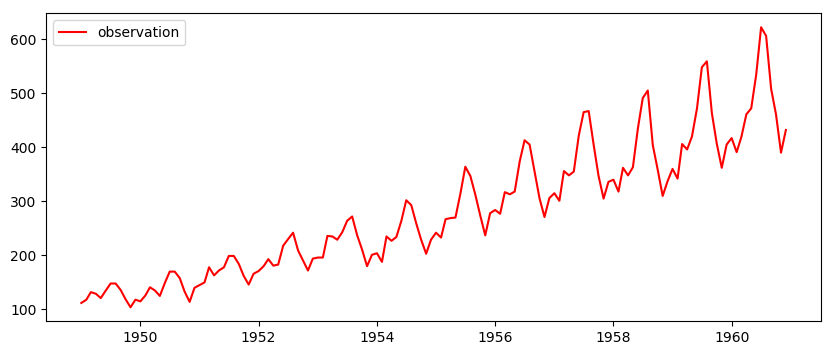

In [94]:
sarimax_pred = sarimax.predict('1960-12', '1962-12') 

plt.figure(figsize=(10, 4))

plt.plot(passengers, c="r", label="observation")
#plt.plot(sarimax_pred, c="b", label="prediction", alpha=0.7)
plt.legend(loc='best')